In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# **Document Classification**

In [50]:
doc=input("enter your document ")
doc=doc.lower()
from nltk import sent_tokenize, word_tokenize
sentences= sent_tokenize(doc)

words=word_tokenize(doc)
print(words)


enter your document In the world of finance, understanding financial reports and making strategic investment decisions are critical for long-term success. The finance department of a company typically analyzes net profit, operating expenses, and cash flow statements to assess fiscal health. Financial analysts use various finance tools to evaluate market trends and recommend investment strategies involving stocks, bonds, and ETFs. A strong investment portfolio is diversified and aligned with both short-term and long-term financial goals. The CFO plays a central role in managing finance operations, forecasting budgets, and mitigating risks such as inflation and currency fluctuation. Modern finance heavily depends on data analytics to track financial performance and guide business growth.
['in', 'the', 'world', 'of', 'finance', ',', 'understanding', 'financial', 'reports', 'and', 'making', 'strategic', 'investment', 'decisions', 'are', 'critical', 'for', 'long-term', 'success', '.', 'the'

In [75]:
import streamlit as st
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

h=['healthcare','medicine','diagnosis','treatment']
f=['finance','money','cash','investment']
t=['technology','ai','data']
l=['legal','law','defense']

stopWords = set(stopwords.words('english'))
punctuations = {'.', ',', ';', '?', '!'}

def classify_document(text):
    words= word_tokenize(text)
    words = [w for w in words if w not in stopWords]
    words = [w for w in words if w not in punctuations]
    dicth, dictf, dictt, dictl = {}, {}, {}, {}

    for i in words:
        if i in h:
            dicth[i] = dicth.get(i, 0) + 1
        elif i in f:
            dictf[i] = dictf.get(i, 0) + 1
        elif i in t:
            dictt[i] = dictt.get(i, 0) + 1
        elif i in l:
            dictl[i] = dictl.get(i, 0) + 1

    hv = max(dicth.values()) if dicth else 0
    fv = max(dictf.values()) if dictf else 0
    tv = max(dictt.values()) if dictt else 0
    lv = max(dictl.values()) if dictl else 0

    if hv and hv > max(fv, tv, lv):
        return "Document is Healthcare"
    elif fv and fv > max(hv, tv, lv):
        return "Document is Finance"
    elif tv and tv > max(hv, fv, lv):
        return "Document is Technology"
    elif lv and lv > max(hv, fv, tv):
        return "Document is Law"
    else:
        return "No categories matched."

st.title("Document Classification")

user_input = st.text_area("Enter doc")

if st.button("Classify Document"):
    if user_input.strip():
        result = classify_document(user_input)
        st.success(result)
    else:
        st.warning("Enter text doc to classify")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-07-29 08:12:07.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 08:12:07.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 08:12:07.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 08:12:07.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 08:12:07.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 08:12:07.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 08:12:07.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.

In [76]:
classify_document('In the healthcare system, proper diagnosis and timely treatment are crucial to managing chronic conditions like hypertension and diabetes. A physician typically reviews the patient’s medical history, conducts a physical exam, and orders relevant lab tests. In cases of hypertension, blood pressure is monitored regularly, and medications such as beta-blockers or ACE inhibitors are prescribed. The patient is advised on lifestyle modifications including a heart-healthy diet, physical exercise, and regular checkups with their healthcare provider. Healthcare professionals often use electronic medical records to track diagnosis, medications, and treatment outcomes. Preventive care in healthcare is essential for reducing the burden of disease and lowering healthcare costs over time.')

'Document is Healthcare'

# **Bag of words**

In [46]:
doc=input("enter your document ")
doc=doc.lower()


enter your document In the healthcare system, proper diagnosis and timely treatment are crucial to managing chronic conditions like hypertension and diabetes. A physician typically reviews the patient’s medical history, conducts a physical exam, and orders relevant lab tests. In cases of hypertension, blood pressure is monitored regularly, and medications such as beta-blockers or ACE inhibitors are prescribed. The patient is advised on lifestyle modifications including a heart-healthy diet, physical exercise, and regular checkups with their healthcare provider. Healthcare professionals often use electronic medical records to track diagnosis, medications, and treatment outcomes. Preventive care in healthcare is essential for reducing the burden of disease and lowering healthcare costs over time.


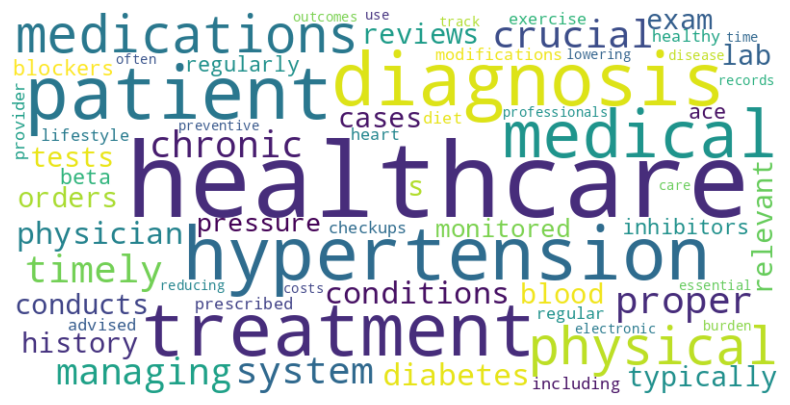

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(doc)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # no axes for the image
plt.show()

In [65]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [77]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.155.4:8501

  Stopping...
^C
